In [1]:
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

In [2]:
def pretty_print_response(response):
  print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SECRET = os.getenv('PLAID_SECRET')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to paid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [4]:
INSTITUTION_ID = "ins_109508"

In [5]:
# YOUR CODE HERE
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment='sandbox')
client.Institutions.get(1)

{'institutions': [{'country_codes': ['US'],
   'credentials': [{'label': 'Username', 'name': 'username', 'type': 'text'},
    {'label': 'Password', 'name': 'password', 'type': 'password'}],
   'has_mfa': False,
   'input_spec': 'fixed',
   'institution_id': 'ins_25',
   'mfa': [],
   'mfa_code_type': 'numeric',
   'name': 'Ally Bank',
   'products': ['assets',
    'auth',
    'balance',
    'transactions',
    'income',
    'identity'],
   'routing_numbers': ['124003116']}],
 'request_id': 'OXCuTytsXaVAvGm',
 'total': 10439}

### 2. Generate a public token

In [6]:
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])


### 3. Exchange the public token for an access token

In [7]:
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [8]:
client.Accounts.get(access_token)

{'accounts': [{'account_id': 'bJXL3xdr8Zi8wvbVJqBnUNkEy3yjR5fVb36Eb',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'Q5MrVJb69lhmwMlX6VAoUvk1LDLRpxFpmalZQ',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'Z5MPgql6dahGj7PVZBAmsrD3QpQqezFgqb1P6',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [9]:
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())
transaction_response = client.Transactions.get(access_token,start_date,end_date)
trans_list = transaction_response['transactions']
print(json.dumps(transaction_response['transactions'][:2],indent=4, sort_keys=True))

[
    {
        "account_id": "bJXL3xdr8Zi8wvbVJqBnUNkEy3yjR5fVb36Eb",
        "account_owner": null,
        "amount": 6.33,
        "category": [
            "Travel",
            "Car Service",
            "Ride Share"
        ],
        "category_id": "22006001",
        "date": "2019-10-01",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "name": "Uber 072515 SF**POOL**",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        "pending": false,
        "pending_transaction_id": null,
     

### 2. Print the categories for each transaction

In [10]:
transaction_response['transactions'][0].keys()

dict_keys(['account_id', 'account_owner', 'amount', 'category', 'category_id', 'date', 'iso_currency_code', 'location', 'name', 'payment_meta', 'pending', 'pending_transaction_id', 'transaction_id', 'transaction_type', 'unofficial_currency_code'])

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [11]:
dates = []
names = []
amounts = []
categories = []

for item in trans_list:
    dates.append(item['date'])
    names.append(item['name'])
    amounts.append(item['amount'])
    categories.append(item['category'][0])
dates_df = pd.DataFrame(dates) 
names_df = pd.DataFrame(names)
amounts_df = pd.DataFrame(amounts)
categories_df = pd.DataFrame(categories) 
dates_df.rename( columns={0 :'Date'}, inplace=True )
names_df.rename( columns={0 :'Name'}, inplace=True )
amounts_df.rename( columns={0 :'Amount'}, inplace=True )
categories_df.rename( columns={0 :'Category'}, inplace=True )

data = pd.concat([dates_df,names_df,amounts_df,categories_df], axis = 1)
data['Amount'] = data['Amount'].astype('float64')
data.set_index('Date',inplace=True)
data.index=pd.to_datetime(data.index)
data

,Name,Amount,Category
Date,,,
2019-10-01,Uber 072515 SF**POOL**,6.33,Travel
2019-09-28,Tectra Inc,500.00,Food and Drink
2019-09-27,AUTOMATIC PAYMENT - THANK,2078.50,Payment
2019-09-27,KFC,500.00,Food and Drink
2019-09-27,Madison Bicycle Shop,500.00,Shops
2019-09-18,CREDIT CARD 3333 PAYMENT *//,25.00,Payment
2019-09-18,Uber 063015 SF**POOL**,5.40,Travel
2019-09-17,ACH Electronic CreditGUSTO PAY 123456,5850.00,Transfer
2019-09-17,CD DEPOSIT .INITIAL.,1000.00,Transfer


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [12]:
# YOUR CODE HERE
data.dtypes

Name         object
Amount      float64
Category     object
dtype: object

---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [13]:
income = client.Income.get(access_token)

In [14]:
prev_year_income = income['income']['last_year_income']
print(f'Previous years income was ${prev_year_income} ')

Previous years income was $6000 


In [15]:
current_monthly_income = income['income']['income_streams'][0]['monthly_income']
print(f'Current monthly income is ${current_monthly_income} ')

Current monthly income is $500 


In [16]:
projected_year_income = income['income']['projected_yearly_income']
print(f'Projected yearly income is ${projected_year_income} ')

Projected yearly income is $6085 


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calulate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

In [24]:
# YOUR CODE HERE
amount_df = data.groupby('Category').sum()
print(amount_df)

                  Amount
Category                
Food and Drink   3317.19
Payment          6310.50
Recreation        235.50
Shops            1500.00
Transfer        20537.34
Travel             41.52


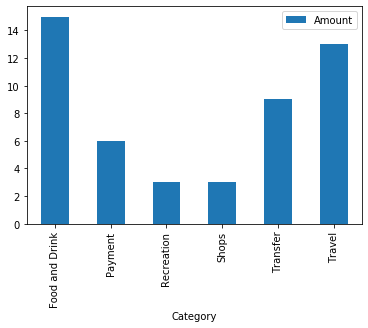

In [18]:
transactions_count = data.groupby('Category').count()
transactions_count.drop(['Name'], axis=1,inplace=True)
transactions_count.plot.bar()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x119f954e0>],
      dtype=object)

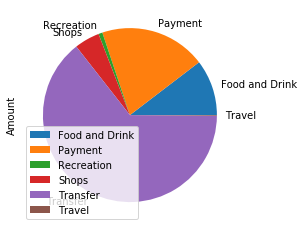

In [25]:
amount_df.plot.pie(subplots=True)

### Calculate the expenses per month

In [26]:
# YOUR CODE HERE
data_multi_index = data.groupby([data.index.year, data.index.month, data.index.day]).first()
data_multi_index

Name   Amount        Category
Date Date Date                                                                
2019 7    3                    Uber 072515 SF**POOL**     6.33          Travel
          5                           United Airlines   500.00          Travel
          15                             INTRST PYMNT    -4.22        Transfer
          16                                 SparkFun    89.40  Food and Drink
          17                               McDonald's    12.00  Food and Drink
          18                      Touchstone Climbing    78.50      Recreation
          19    ACH Electronic CreditGUSTO PAY 123456  5850.00        Transfer
          20             CREDIT CARD 3333 PAYMENT *//    25.00         Payment
          29                AUTOMATIC PAYMENT - THANK  2078.50         Payment
          30                               Tectra Inc   500.00  Food and Drink
     8    2                    Uber 072515 SF**POOL**     6.33          Travel
          4                           United Airlines   500.00          Travel
          14                             INTRST PYMNT    -4.22        Transfer
          15                                 SparkFun    89.40  Food and Drink
          16                               McDonald's    12.00  Food and Drink
          17                      Touchstone Climbing    78.50      Recreation
          18    ACH Electronic CreditGUSTO PAY 123456  5850.00        Transfer
          19             CREDIT CARD 3333 PAYMENT *//    25.00         Payment
          28                AUTOMATIC PAYMENT - THANK  2078.50         Payment
          29                               Tectra Inc   500.00  Food and Drink
     9    1                    Uber 072515 SF**POOL**     6.33          Travel
          3                           United Airlines   500.00          Travel
          13                             INTRST PYMNT    -4.22        Transfer
          14                                 SparkFun    89.40  Food and Drink
          15                               McDonald's    12.00  Food and Drink
          16                      Touchstone Climbing    78.50      Recreation
          17    ACH Electronic CreditGUSTO PAY 123456  5850.00        Transfer
          18             CREDIT CARD 3333 PAYMENT *//    25.00         Payment
          27                AUTOMATIC PAYMENT - THANK  2078.50         Payment
          28                               Tectra Inc   500.00  Food and Drink
     10   1                    Uber 072515 SF**POOL**     6.33          Travel

In [44]:

data_multi_index_1 = data_multi_index.loc[2019,7]
data_multi_index_1.sum()

Name        Uber 072515 SF**POOL**United AirlinesINTRST PY...
Amount                                                9135.51
Category    TravelTravelTransferFood and DrinkFood and Dri...
dtype: object

In [41]:
data_multi_index_2 = data_multi_index.loc[2019,8]
data_multi_index_2.sum()

Name        Uber 072515 SF**POOL**United AirlinesINTRST PY...
Amount                                                9135.51
Category    TravelTravelTransferFood and DrinkFood and Dri...
dtype: object

In [43]:
data_multi_index_3 = data_multi_index.loc[2019,9]
data_multi_index_3.sum()

Name        Uber 072515 SF**POOL**United AirlinesINTRST PY...
Amount                                                9135.51
Category    TravelTravelTransferFood and DrinkFood and Dri...
dtype: object

In [38]:
data_month = [['July', 9135.51], ['August', 9135.51], ['September', 9135.51]]
data_month_df = pd.DataFrame(data_month, columns = ['Month', 'Expenses']) 
data_month_df

,Month,Expenses
0,July,9135.51
1,August,9135.51
2,September,9135.51
